In [113]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
# csv file importing
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving EuroMart_Stores.csv to EuroMart_Stores (1).csv


,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [116]:
df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [117]:
df.tail()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [118]:
df.shape

(8047, 18)

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8047.0,4023.000000,2323.113141,0.0,2011.5,4023.0,6034.5,8046.00
Discount,8047.0,0.110047,0.181773,0.0,0.0,0.0,0.1,0.85
Sales,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.00
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.00
Quantity,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.00


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8047 non-null   int64  
 1   Order ID       8047 non-null   object 
 2   Order Date     8047 non-null   object 
 3   Customer Name  8047 non-null   object 
 4   Country        8047 non-null   object 
 5   State          8047 non-null   object 
 6   City           8047 non-null   object 
 7   Region         8047 non-null   object 
 8   Segment        8047 non-null   object 
 9   Ship Mode      8047 non-null   object 
 10  Category       8047 non-null   object 
 11  Sub-Category   8047 non-null   object 
 12  Product Name   8047 non-null   object 
 13  Discount       8047 non-null   float64
 14  Sales          8047 non-null   int64  
 15  Profit         8047 non-null   int64  
 16  Quantity       8047 non-null   int64  
 17  Feedback?      8047 non-null   bool   
dtypes: bool(

In [121]:
df.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Order Date,0
Customer Name,0
Country,0
State,0
City,0
Region,0
Segment,0
Ship Mode,0


In [124]:
df.nunique()

,0
Unnamed: 0,8047
Order ID,4117
Order Date,1214
Customer Name,792
Country,15
State,127
City,999
Region,3
Segment,3
Ship Mode,4


In [128]:
m = ['Region','Segment','Ship Mode','Category','Feedback?']
for i in m:
  print(i)
  print(pd.DataFrame(df[i].value_counts()),"\n")

Region
         count
Region        
Central   4426
North     1811
South     1810 

Segment
             count
Segment           
Consumer      4174
Corporate     2514
Home Office   1359 

Ship Mode
              count
Ship Mode          
Economy        4862
Economy Plus   1590
Priority       1169
Immediate       426 

Category
                 count
Category              
Office Supplies   5286
Technology        1523
Furniture         1238 

Feedback?
           count
Feedback?       
False       4033
True        4014 



In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df.Profit.value_counts()

,count
Profit,
0,232
4,185
5,183
6,181
8,179
...,...
419,1
-133,1
302,1


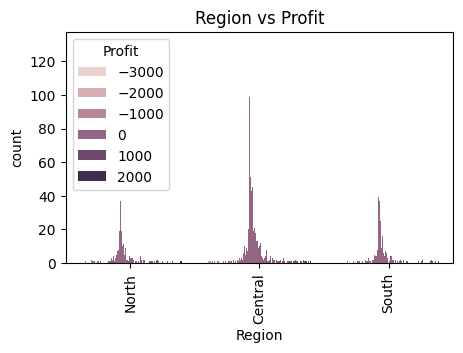

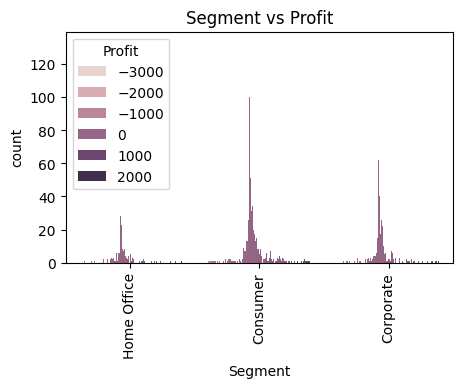

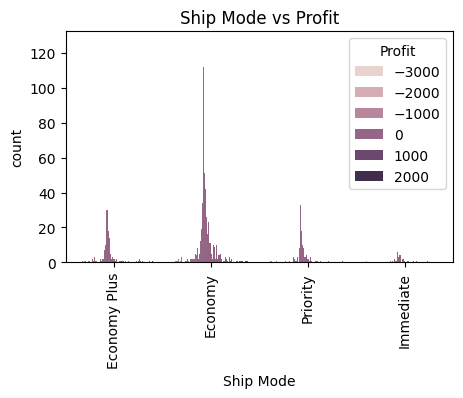

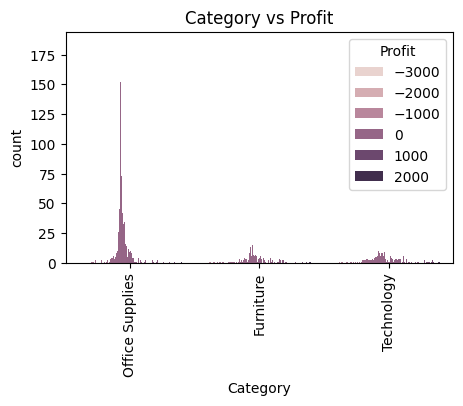

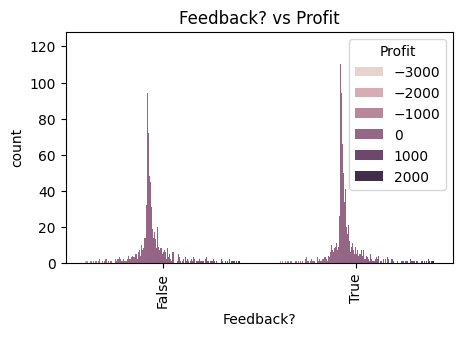

In [129]:
for col in m:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df,x=col,hue="Profit")
    plt.title(f"{col} vs Profit")
    plt.xticks(rotation=90)
    plt.show()

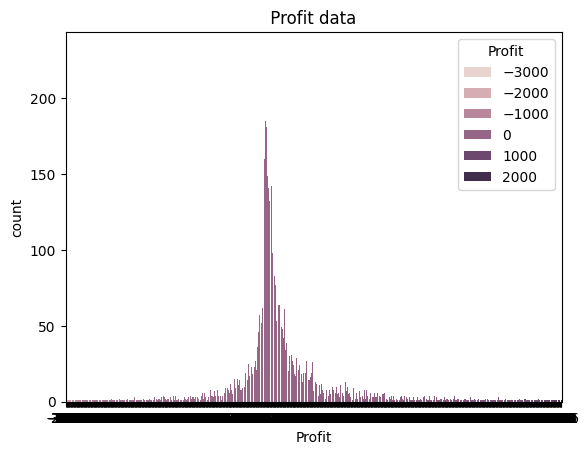

In [13]:
# countplot graph for profit
sns.countplot(x='Profit',data=df,hue='Profit')
plt.title(" Profit data ")
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

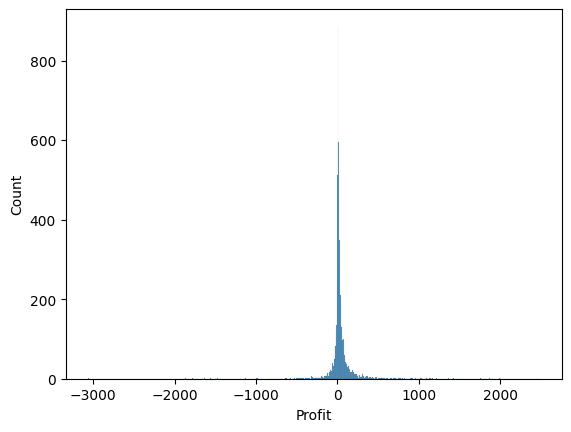

In [16]:
sns.histplot(df.Profit)


In [ ]:
# hist and box plot graph
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Profit', y='Sales', data=df)

<Figure size 1000x500 with 0 Axes>

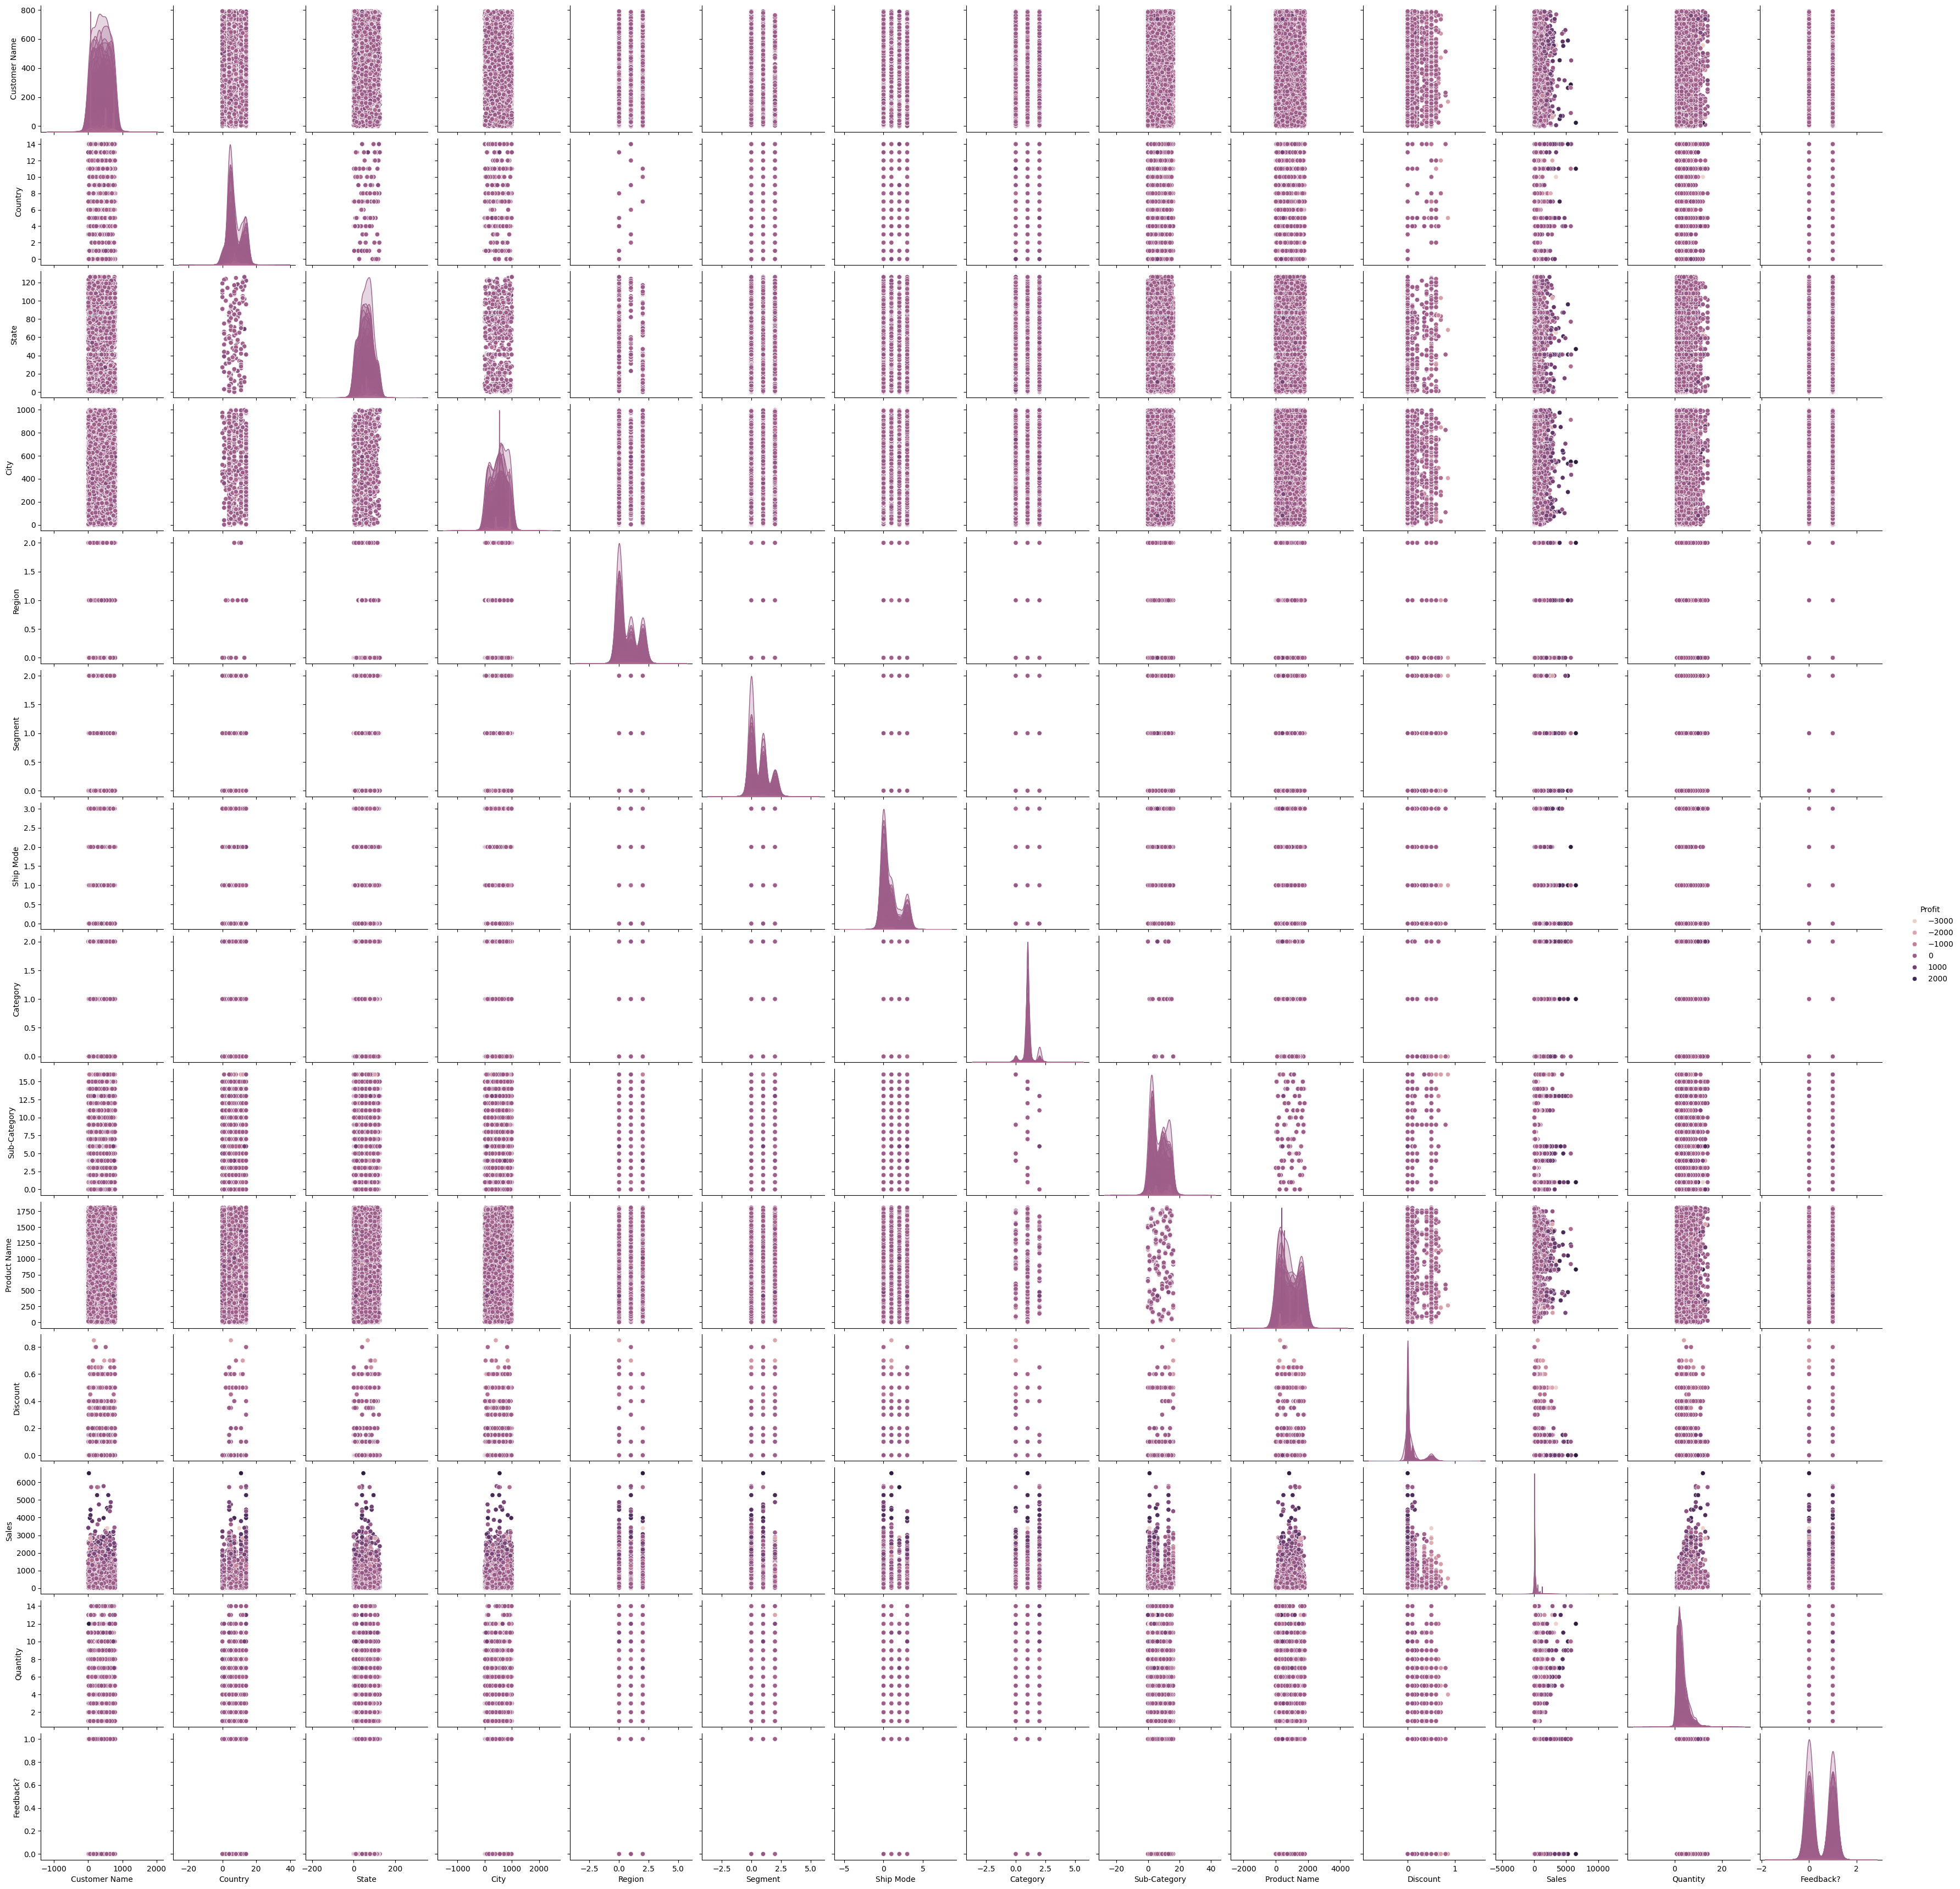

In [79]:
# pair plot graph
plt.figure(figsize=(10,5))
sns.pairplot(df[['Order ID'	,'Order Date',	'Customer Name',	'Country'	,'State'	,'City'	,'Region'	,'Segment'	,'Ship Mode'	,'Category'	,'Sub-Category',	'Product Name'	,'Discount'	,'Sales'	,'Profit',	'Quantity','Feedback?'	]], hue='Profit')

In [96]:
S=df.select_dtypes(include=np.number)
S

,Unnamed: 0,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,0
1,1,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,1
2,2,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,1
3,3,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,1
4,4,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8042,391,14,41,554,1,1,0,0,4,1017,0.0,245,91,2,1
8043,8043,156,8,79,287,0,2,1,1,2,216,0.5,30,-10,2,0
8044,8044,156,8,79,287,0,2,1,1,3,162,0.5,23,-6,4,1
8045,8045,156,8,79,287,0,2,1,2,11,1666,0.5,108,-19,3,0


In [110]:
df = df.drop(['Order Date'], axis=1,inplace=True)

In [112]:
df

In [130]:
df.head(10)

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True
5,5,AZ-2011-617423,2011-01-05,Daniel Burke,France,Auvergne-Rhône-Alpes,Echirolles,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",0.0,90,21,3,False
6,6,AZ-2011-617423,2011-01-05,Daniel Burke,France,Auvergne-Rhône-Alpes,Echirolles,Central,Home Office,Priority,Office Supplies,Art,"Sanford Canvas, Fluorescent",0.0,207,77,4,False
7,7,AZ-2011-2918397,2011-01-07,Fredrick Beveridge,France,Provence-Alpes-Côte d'Azur,La Seyne-sur-Mer,Central,Corporate,Priority,Furniture,Bookcases,"Bush Floating Shelf Set, Pine",0.1,155,36,1,True
8,8,AZ-2011-2918397,2011-01-07,Fredrick Beveridge,France,Provence-Alpes-Côte d'Azur,La Seyne-sur-Mer,Central,Corporate,Priority,Office Supplies,Fasteners,"Accos Thumb Tacks, Assorted Sizes",0.0,33,2,3,True
9,9,AZ-2011-2918397,2011-01-07,Fredrick Beveridge,France,Provence-Alpes-Côte d'Azur,La Seyne-sur-Mer,Central,Corporate,Priority,Office Supplies,Storage,"Smead Lockers, Industrial",0.1,716,143,4,True


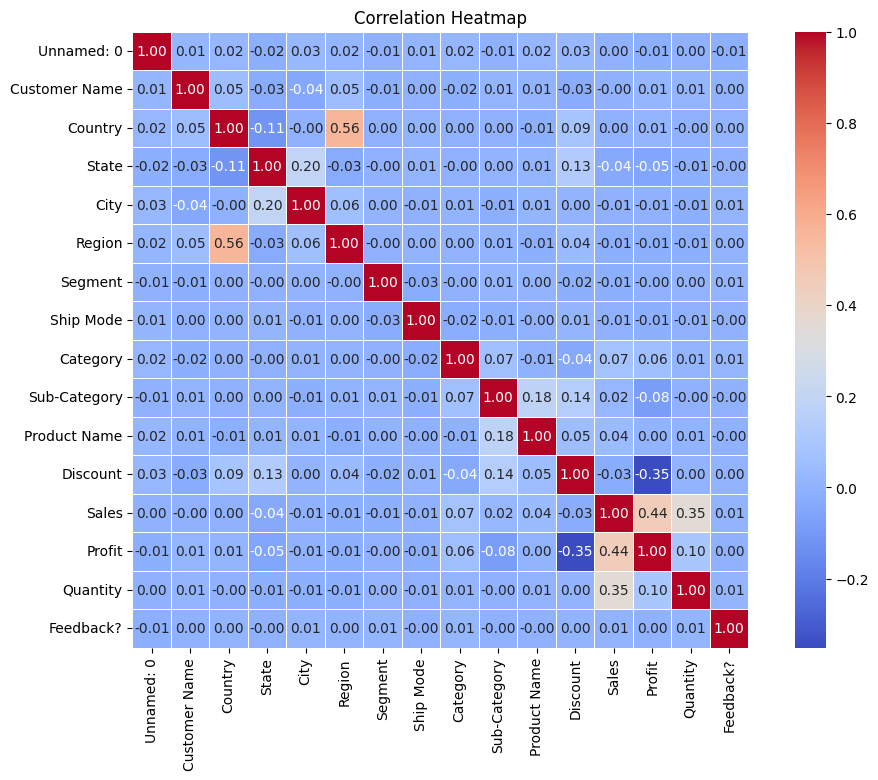

In [67]:
# heat map graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True, fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5, square=True
)

plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Ship Mode', ylabel='count'>

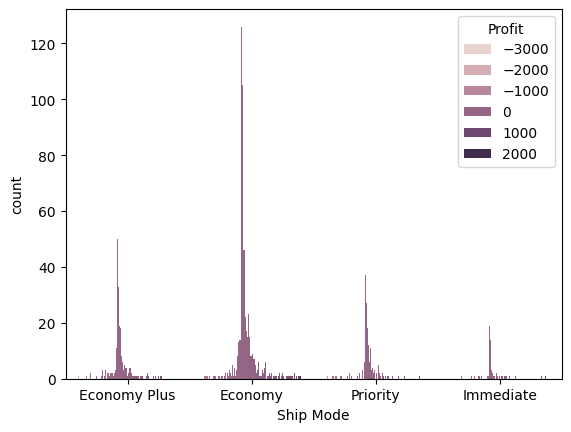

In [136]:
sns.countplot(data=df,hue='Profit',x='Ship Mode')

array([[<Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Quantity'}>]], dtype=object)

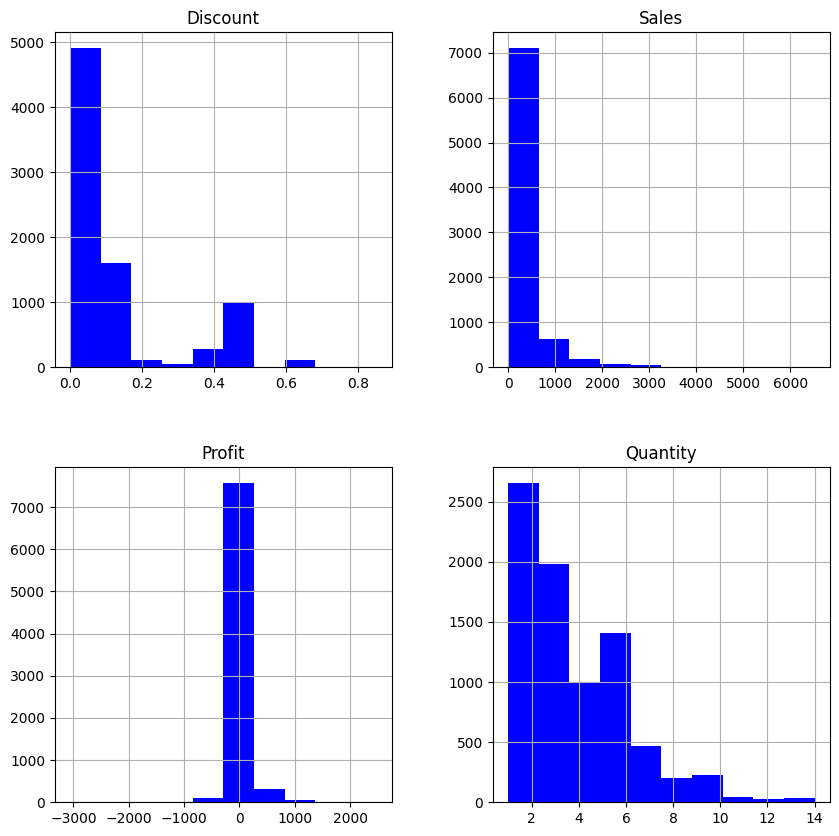

In [139]:
df.hist(color='blue',figsize=(10,10))

In [138]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
#Declaring the  target feature and independent feature
x=df.drop(['Profit', 'Order ID', 'Order Date'],axis=1)
y=df['Profit']

In [70]:
print(x_train.shape)

(6437, 17)


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
label_encoder = LabelEncoder()
df['Order ID'] = label_encoder.fit_transform(df['Order ID'])

In [48]:
label_encoder = LabelEncoder()
df['Customer Name'] = label_encoder.fit_transform(df['Customer Name'])

In [49]:
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [50]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [51]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [52]:
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])

In [53]:
label_encoder = LabelEncoder()
df['Segment'] = label_encoder.fit_transform(df['Segment'])

In [54]:
label_encoder = LabelEncoder()
df['Ship Mode'] = label_encoder.fit_transform(df['Ship Mode'])

In [55]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [56]:
label_encoder = LabelEncoder()
df['Sub-Category'] = label_encoder.fit_transform(df['Sub-Category'])

In [57]:
label_encoder = LabelEncoder()
df['Product Name'] = label_encoder.fit_transform(df['Product Name'])

In [58]:
label_encoder = LabelEncoder()
df['Feedback?'] = label_encoder.fit_transform(df['Feedback?'])

In [63]:
#Declaring the  target feature and independent feature
x=df.drop(['Profit', 'Order ID', 'Order Date'],axis=1)
y=df['Profit']

In [74]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [76]:
y_pred=model.predict(x_test)
y_pred

array([ 78.2315965 ,  19.80542371, 174.18620556, ..., 112.69472213,
         2.52167485,  42.01635499])

In [132]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6835053741518937

In [133]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"Accuracy: {r2_score(y_test, y_pred)*100:.2f}%")

Accuracy: 68.35%


In [103]:
input_data =(0, 677, 12, 103, 847, 1, 2, 1, 1, 12, 670, 0.5, 45, 3, 0)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction =model.predict(input_data_reshaped)

print(prediction)
# The prediction value is continuous, so comparing it to 0 for a binary outcome (like 'buy' or 'not buy') might not be appropriate
# Instead, you might want to interpret the predicted profit directly.
# For example, if profit is positive, it's a 'buy', otherwise 'not buy'.
# Let's adjust the interpretation based on predicted profit.
if prediction[0] > 0:
    print("The predicted profit is positive.")
else:
    print("The predicted profit is not positive.")

[-25.725]
The predicted profit is not positive.


In [93]:
if y_pred[0] == 0:
    print("The person is NOT likely to buy the product.")
else:
    print("The person is likely to buy the product.")

The person is likely to buy the product.


In [104]:
df.tail()

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,8042,2943,2014-12-31,391,14,41,554,1,1,0,0,4,1017,0.0,245,91,2,1
8043,8043,3926,2014-12-31,156,8,79,287,0,2,1,1,2,216,0.5,30,-10,2,0
8044,8044,3926,2014-12-31,156,8,79,287,0,2,1,1,3,162,0.5,23,-6,4,1
8045,8045,3926,2014-12-31,156,8,79,287,0,2,1,2,11,1666,0.5,108,-19,3,0
8046,8046,2943,2014-12-31,391,14,41,554,1,1,0,2,13,1186,0.0,867,251,5,0


In [101]:
df.head(10)

,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,3344,2011-01-01,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,0
1,1,510,2011-01-03,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,1
2,2,349,2011-01-04,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,1
3,3,3249,2011-01-04,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,1
4,4,3249,2011-01-04,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,1
5,5,319,2011-01-05,155,4,7,284,0,2,3,1,2,288,0.0,90,21,3,0
6,6,319,2011-01-05,155,4,7,284,0,2,3,1,2,1520,0.0,207,77,4,0
7,7,129,2011-01-07,253,4,87,473,0,1,3,0,4,374,0.1,155,36,1,1
8,8,129,2011-01-07,253,4,87,473,0,1,3,1,8,43,0.0,33,2,3,1
9,9,129,2011-01-07,253,4,87,473,0,1,3,1,14,1609,0.1,716,143,4,1


,Unnamed: 0,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,3344,2011-01-01,677,12,103,847,1,2,1,1,12,670,0.5,45,-26,3,0
1,1,510,2011-01-03,724,14,41,841,1,0,0,0,4,513,0.0,854,290,7,1
2,2,349,2011-01-04,177,4,7,909,0,0,0,1,2,294,0.0,140,21,3,1
3,3,3249,2011-01-04,540,14,41,109,1,1,0,1,2,306,0.5,27,-22,2,1
4,4,3249,2011-01-04,540,14,41,109,1,1,0,1,14,585,0.5,17,-1,2,1
5,5,319,2011-01-05,155,4,7,284,0,2,3,1,2,288,0.0,90,21,3,0
6,6,319,2011-01-05,155,4,7,284,0,2,3,1,2,1520,0.0,207,77,4,0
7,7,129,2011-01-07,253,4,87,473,0,1,3,0,4,374,0.1,155,36,1,1
8,8,129,2011-01-07,253,4,87,473,0,1,3,1,8,43,0.0,33,2,3,1
9,9,129,2011-01-07,253,4,87,473,0,1,3,1,14,1609,0.1,716,143,4,1


In [135]:
input_data =(8042, 391, 14 ,41 ,554 ,1 ,1, 0, 0 ,4 ,1017 ,0.0 ,245, 2,1)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction =model.predict(input_data_reshaped)

print(prediction)
# The prediction value is continuous, so comparing it to 0 for a binary outcome (like 'buy' or 'not buy') might not be appropriate
# Instead, you might want to interpret the predicted profit directly.
# For example, if profit is positive, it's a 'buy', otherwise 'not buy'.
# Let's adjust the interpretation based on predicted profit.
if prediction[0] > 0:
    print("The predicted profit is close & positive.")
else:
    print("The predicted profit is not close & positive.")

[55.09]
The predicted profit is close & positive.
